In [1]:
#from pymol import cmd
import csv

from vina import Vina

from openbabel import pybel

from rdkit import Chem


from rdkit.Chem import AllChem, Draw

import MDAnalysis as mda
from MDAnalysis.coordinates import PDB

import sys, os
sys.path.insert(1, 'utilities/')

from src.docking_modify import get_box, fix_protein

import warnings
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

/Users/acegid/miniforge3/lib/python3.10/site-packages/prolif/datafiles.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


In [3]:
os.chdir("All_PDB/")

#### fix_protein (PDBFixer)

For proteins with missing amino acids or residues, or to ensure a more thorough sanitization of protein I include the _fix_protein()_ function, which employs PDBFixer to correct a wide range of common errors in protein pdb files. Furthermore, PDBFixer enables the assignment of pH-dependent protonation states to proteins.


>**Warning 1:**  It is possible to encounter problems with protein fixing when using **_fix_protein()_** and AutoDock Tools' **_prepare_receptor_** or when running LeDock. To resolve the issue, it is best to set the parameter _-A hydrogens_ in _prepare receptor_.


>**Hint:** PDBFixer is a great solution for many systems because it can solve serious problems in PDB files. As a result, PDBFixer renumbers the residues beginning with 1 regardless of the numbering on the original PDB file. To address this issue, the **_fix_protein()_** function includes a protocol for atomically renumbering the residues in accordance with the original PDB file.


**_fix_protein ( params )_**

Params:
      
  - **filename**: _str or path-like_ ; input file containing protein struture to be modified, file extrension must be pdb

  - **addHs_pH**: _float_ ; Add hydrogens at user defined pH

  - **try_renumberResidues**: _bool_ ; By default PDBFixer renumarets residues starting in 1, this option tries to recover originar residues numbering
    
  - **output**: _str or path-like_ ; output filename, extension must be pdb

In [5]:
# Chemin du dossier contenant les fichiers PDB
proteins_dir = os.getcwd()

# Parcours de tous les fichiers PDB dans le dossier
for filename in os.listdir(proteins_dir):
    # Vérification de l'extension du fichier
    if filename.endswith('.pdb'):
        # Chemin complet du fichier
        filepath = os.path.join(proteins_dir, filename)
        
        # Traitement du fichier avec la fonction fix_protein
        fix_protein(filename=filepath, addHs_pH=7.4, try_renumberResidues=True, output=f"{os.path.splitext(filename)[0]}_H.pdb")

Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepton for extra details
Not possible to renumber residues, check excepto

ValueError: could not convert string to float: '         '

### Ligand sanitization

Due to the variability of ligands and formats, ligand sanitization and preparation can be one of the most difficult tasks to complete. Setting protonation states for a ligand, for example, can be difficult. It is highly recommended that the user knows and understands the proper states for his/her ligand(s) when using Jupyter Dock or any other molecular docking approach.

In this example, after splitting the ligand and protein after fetching with pymol, the ligand has sanitization problems **(sanitize=False in Chem.MolFromMol2File)**

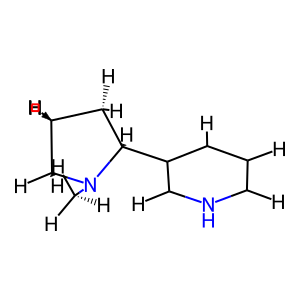

In [8]:
m=Chem.MolFromPDBFile('ligands/Nicotine.pdb',sanitize=False)
Draw.MolToImage(m)

>**Hint:** One solution for simple sanitization problems is to use OpenBAbel to convert the molecule and add the necessary hydrogens for molecular docking (Pybel). The definitions for carrying out molecules in OpenBabel differ from those in RDKIt. As a result, OpenBabel is capable of handling the conversion.

In [9]:
mol= [m for m in pybel.readfile(filename='ligands/Nicotine.pdb',format='pdb')][0]
mol.addh()
out=pybel.Outputfile(filename='ligands/Nicotine_H.pdb',format='pdb',overwrite=True)
out.write(mol)
out.close()

>The end result of ligand sanitization is a new molecule that RDKit can display without having to use the sanitization parameter. Furthermore, the output structure for this example corresponds exactly to the one reported in the PDB database (PDB 1AZ8)

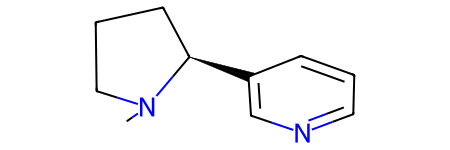

In [11]:
m=Chem.MolFromPDBFile('ligands/Nicotine_H.pdb')
m

### Convert receptors from pdb to pdbqt
This step is crucial, because Vina only accepts pdbqt files for docking.

In [5]:
# Parcours de tous les fichiers PDB dans le dossier
for filename in os.listdir(proteins_dir):
    # Vérification de l'extension du fichier
    if filename.endswith('.pdb'):
        # Chemin complet du fichier
        filepath = os.path.join(proteins_dir, filename)
        
        # Lecture du fichier PDB
        protein = [m for m in pybel.readfile(filename=filepath, format='pdb')][0]
        
        # Création du fichier de sortie PDBQT
        output_filename = f"{os.path.splitext(filename)[0]}.pdbqt"
        output_filepath = os.path.join(proteins_dir, output_filename)
        out = pybel.Outputfile(filename=output_filepath, format='pdbqt', overwrite=True)
        out.write(protein)
        out.close()

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/acegid/Desktop/Smoking_Research/Docking/Docking_All_PDB/All_PDB/1X41.pdb)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/acegid/Desktop/Smoking_Research/Docking/Docking_All_PDB/All_PDB/1X41.pdb)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/acegid/Desktop/Smoking_Research/Docking/Docking_All_PDB/All_PDB/1X41.pdb)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/acegid/Desktop/Smoking_Research/Docking/Docking_All_PDB/All_PDB/1X41.pdb)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/acegid/Desktop/Smoking_Research/Docking/Docking_All_PDB/All_

KeyboardInterrupt: 

>We do also the same with the ligand. We should convert ligand from pdb to pdbqt befor docking
>Then we'll keep only the lines containing atom information in the pdbqt file before docking with Vina.
>To do so, I run the following command

In [7]:
!bash ../clean_pdbqt_file.sh

In [ ]:
!mkdir Receptors
!for file in *.part_atom_only.pdbqt; mv "$file" Receptors

## Docking with Vina
We ran the loop through all the receptors and docked each one with the ligand.
But first we need to get the dimensions of the ligand before docking.
### Box definition

This is possibly the most important feature of this programm. Making a docking box without the use of a visualizer or any other additional tools. As a result, AutoDock Vina (and LeDock) can now be run entirely in a Jupyter notebook.

Mengwu Xiao and his clever Pymol plug-in ["GetBox"](https://github.com/MengwuXiao/GetBox-PyMOL-Plugin) inspired the box definition in this Project. 

Jupyter Dock makes use of Mengwu Xiao Pymol implementation, but this time without using the Pymol API implementation.

>**Warning:** The function **_get_box()_** is built into the Pymol API. As a result, in order to compute the docking box, the docking system files must be initialized using Pymol.

>**Hint:** The integration of **_get_box()_** as Pymol integration allows the definition of amazing boxes based on Pymol's powerful selection tools. A ligand, a residue, a set of residues, atom(s), pseudoatom(s), and any custom selection valid within the [Pymol selection algebra](https://pymolwiki.org/index.php/Selection_Algebra) can be used to set the box.  

In [9]:
# Chemin vers le répertoire contenant les fichiers des récepteurs
receptors_dir = "Receptors"

# Chemin vers le répertoire contenant les fichiers des ligands
ligands_dir = "../ligands"

 # Chargement du ligand à partir du répertoire des ligands
ligand_file = os.path.join(ligands_dir, "Nicotine_H.pdbqt")

# Calcul des dimensions du ligand
center, size = get_box(ligand_file, extending=5.0)

# Initialisation de la liste pour stocker les résultats
results = []

# Parcours des fichiers dans le dossier des récepteurs
for filename in os.listdir(receptors_dir):
    # Chemin complet vers le fichier du récepteur
    receptor_file = os.path.join(receptors_dir, filename)

    # Initialisation d'un nouvel objet Vina pour chaque récepteur
    v = Vina(sf_name='vina')

    # Chargement du récepteur dans l'objet Vina
    v.set_receptor(receptor_file)
    v.set_ligand_from_file(ligand_file)
    
    
    # Calcul des maps de Vina
    v.compute_vina_maps(center=[center['center_x'], center['center_y'], center['center_z']], 
                       box_size=[size['size_x'], size['size_y'], size['size_z']])
    
    # Score initial
    energy_before = v.score()
    print(f'Score avant minimisation pour {filename}: {energy_before[0]} (kcal/mol)')
    
    # Minimisation locale
    energy_minimized = v.optimize()
    print(f'Score après minimisation pour {filename}: {energy_minimized[0]} (kcal/mol)')
    
    # Docking du ligand 
    v.dock(exhaustiveness=10, n_poses=10)
    
    # Enregistrement des poses résultantes du docking
    v.write_poses(f"{filename[:-6]}ligand_out.pdbqt", n_poses=10, overwrite=True)

    
    # Ajout des résultats à la liste
    results.append({
        'Receptor': filename,
        'Score_before_minimization': energy_before[0],
        'Score_after_minimization': energy_minimized[0]
    })

# Écriture des résultats dans un fichier CSV
csv_filename = "docking_results.csv"
with open(csv_filename, mode='w', newline='') as file:
    fieldnames = ['Receptor', 'Score_before_minimization', 'Score_after_minimization']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    for result in results:
        writer.writerow(result)

print(f"Les résultats ont été enregistrés dans le fichier CSV : {csv_filename}")

Computing Vina grid ... done.
Score avant minimisation pour 2YTQ_H_atom_only.pdbqt: 180.719 (kcal/mol)
Score après minimisation pour 2YTQ_H_atom_only.pdbqt: -2.688 (kcal/mol)
Performing local search ... done.
Performing docking (random seed: -1460569618) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
Score avant minimisation pour 2LMJ_H_atom_only.pdbqt: 78.885 (kcal/mol)
Score après minimisation pour 2LMJ_H_atom_only.pdbqt: -0.707 (kcal/mol)

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -3.553          0          0
   2       -3.441      1.315      4.488
   3       -3.278      3.515      5.448
   4        -3.25      2.098       5.45
   5       -3.236      1.241      2.476
   6       -3.226      3.034      6.516
   7       -3.196      3.069      4.977
   8       -3.185        1.9      

In [ ]:
!mkdir Output_Vina
!for for file in *.ligand_out.pdbqt; mv "$file" Output_Vina